In [ ]:
Tache 7


In [2]:
import numpy as np
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalisation donnee entrainement ( pixel divise par la valeur maximale)
x_train_normalized = x_train / 255.0

# Normalisation donnee test
x_test_normalized = x_test / 255.0

# Affichage de la forme apres normalisation
print("x_train_normalized : ", x_train_normalized.shape)
print("x_test_normalized : ", x_test_normalized.shape)

x_train_normalized :  (60000, 28, 28)
x_test_normalized :  (10000, 28, 28)


In [ ]:
Tache 8

In [3]:
from keras.models import Sequential
from keras.layers import Input, Flatten, Dense
from keras.callbacks import ModelCheckpoint 
import os

def get_model_mnist(input_shape=(28, 28)):
    model = Sequential()
    
    #couche d'entree
    model.add(Input(shape=input_shape))
    
    # couche flatten pour aplatir les donnees en un vecteur
    model.add(Flatten())
    
    # deux couches cachees 
    model.add(Dense(128, activation='relu'))
    model.add(Dense(32, activation='relu'))
    
    # nombre de classes  (de 0 à 9)
    num_classes = 10  
    model.add(Dense(num_classes, activation='softmax'))
    
    return model






# exemple
mnist_model = get_model_mnist()
mnist_model.summary()

#Compilation
mnist_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

# Callback
model_folder = 'models/mnist/best_model.h5'
os.makedirs('models/mnist', exist_ok=True)
save_callback = ModelCheckpoint(filepath=model_folder, verbose=0, save_best_only=True)




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 32)                4128      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 104938 (409.91 KB)
Trainable params: 104938 (409.91 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________



In [ ]:
Tache 9


Epoch 1/20


118/118 [==============================] - 3s 9ms/step - loss: 0.6177 - accuracy: 0.8267 - val_loss: 0.2513 - val_accuracy: 0.9276
Epoch 2/20
 10/118 [=>............................] - ETA: 0s - loss: 0.2364 - accuracy: 0.9389

C:\Users\kam2v\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


118/118 [==============================] - 1s 6ms/step - loss: 0.2187 - accuracy: 0.9387 - val_loss: 0.1850 - val_accuracy: 0.9483
Epoch 3/20
118/118 [==============================] - 1s 6ms/step - loss: 0.1628 - accuracy: 0.9540 - val_loss: 0.1536 - val_accuracy: 0.9568
Epoch 4/20
118/118 [==============================] - 1s 6ms/step - loss: 0.1310 - accuracy: 0.9627 - val_loss: 0.1278 - val_accuracy: 0.9615
Epoch 5/20
118/118 [==============================] - 1s 6ms/step - loss: 0.1102 - accuracy: 0.9684 - val_loss: 0.1158 - val_accuracy: 0.9652
Epoch 6/20
118/118 [==============================] - 1s 6ms/step - loss: 0.0930 - accuracy: 0.9735 - val_loss: 0.1045 - val_accuracy: 0.9682
Epoch 7/20
118/118 [==============================] - 1s 6ms/step - loss: 0.0801 - accuracy: 0.9773 - val_loss: 0.1001 - val_accuracy: 0.9718
Epoch 8/20
118/118 [==============================] - 1s 6ms/step - loss: 0.0700 - accuracy: 0.9798 - val_loss: 0.0950 - val_accuracy: 0.9716
Epoch 9/20
118/11

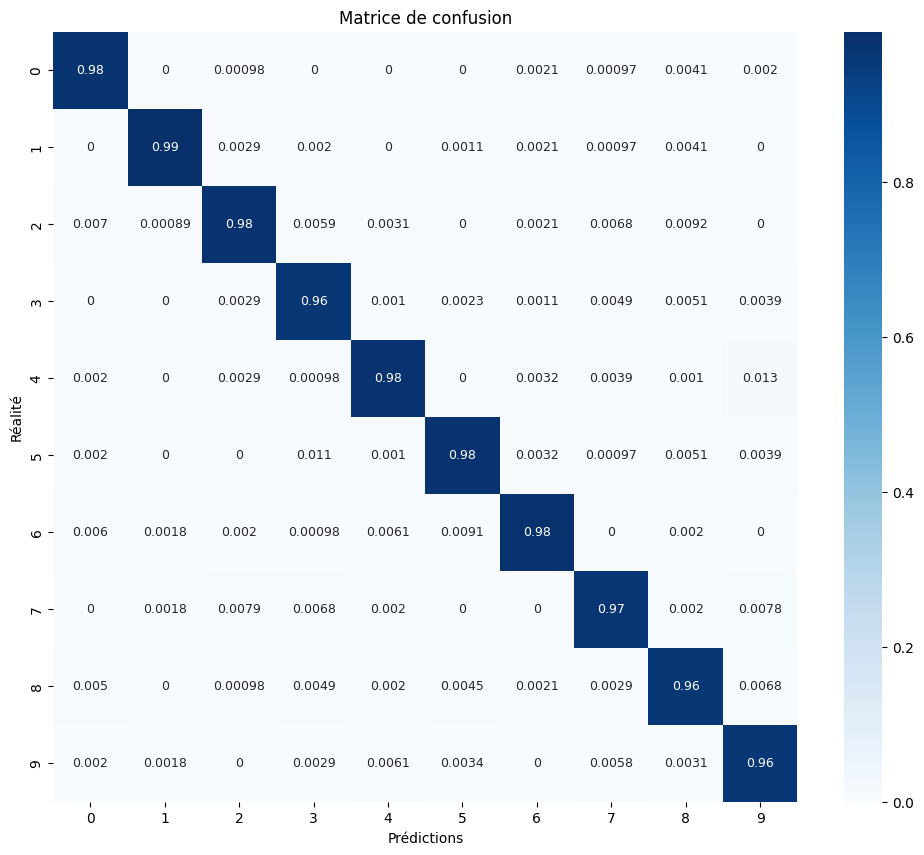

Train Accuracy: 0.9964666962623596
Validation Accuracy: 0.9757000207901001


In [4]:
import numpy as np
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
history = mnist_model.fit(
    x_train_normalized,
    y_train,
    epochs=20,
    batch_size=512,
    validation_data=(x_test_normalized, y_test),
    callbacks=[save_callback]
)
# Prédictions sur les données de test
y_prediction = mnist_model.predict(x_test_normalized)
y_prediction = np.argmax(y_prediction, axis=1)

# Afficher les prédictions erronées
incorrect_predictions = np.where(y_prediction != y_test)[0]
print("Exemples de prédictions erronées :")
for i in range(6):
    idx = incorrect_predictions[i]
    print(f"Prédiction: {y_prediction[idx]} (True: {y_test[idx]})")

# Matrice de confusion
conf_matrix = confusion_matrix(y_test, y_prediction, normalize='pred')
fig, ax = plt.subplots(1, 1, figsize=(12, 10))
sns.heatmap(conf_matrix, annot=True, annot_kws={"fontsize": 9}, cmap="Blues", ax=ax)
plt.title("Matrice de confusion")
plt.xlabel("Prédictions")
plt.ylabel("Réalité")
plt.show()

print("Train Accuracy:", history.history['accuracy'][-1])
print("Validation Accuracy:", history.history['val_accuracy'][-1])
